# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Options Pricing
In the previous notebook, you learned how to prepare the dataset required for the machine learning approach. We've got all the necessary input features, therefore, in this notebook, we will move forward and predict options pricing using an ML model. The model that we are going to use is Artificial Neural Networks (ANN).

The notebook is structured as follows:
1. [Import Libraries and Data](#get)
2. [Splitting the Dataset](#split)
3. [Model Parameters](#param)
4. [Fit the Model](#fit)
5. [Predict Option Prices](#pred)
6. [Performance Measure](#evaluate)
7. [Conclusion](#conclusion)

## Import Libraries
You will use the `pandas`, `numpy`, and `matplotlib` libraries for data manipulation and visualisation.

We are also going to use the modules of the SciKit-Learn (sklearn) library. We will import the `MLPRegressor`from `neural_network` to train the model, `StandardScaler` from `preprocessing` to normalise the data, `train_test_split` from `model_selection` to split the dataset into train and test data, and the `r2_score` from `metrics` to measure the performance of the model.

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For ignoring warnings
import warnings 
warnings.filterwarnings('ignore')

# For data visualisation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-v0_8-darkgrid')

# For training the model
from sklearn.neural_network import MLPRegressor

# For data preprocessing
from sklearn.preprocessing import StandardScaler

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For measuring the performance
from sklearn.metrics import r2_score

<a id='get'></a>
## Get the Data
In the previous notebook, we performed feature engineering and created a dataframe `features_data`. This dataframe has been stored in a CSV file named `features_data_options_pricing.csv`. This CSV file is also available in the zip file of the unit 'Python Codes and Data' in the 'Course Summary' section.

So let us begin by first importing the data.

In [2]:
# Import the data
MLP_data = pd.read_csv(
    '../data_modules/features_data_options_pricing_2010_2022.csv',  index_col=0)

# Set index to datetime
MLP_data.index = pd.to_datetime(MLP_data.index)

# Display the first 5 rows
MLP_data.head()

,call_price,years_to_expiry,risk_free_rate,volatility,moneyness
2010-03-30,80.50,0.00274,0.44,0.15,98.28
2010-03-30,69.05,0.00274,0.44,0.15,73.28
2010-03-30,44.35,0.00274,0.44,0.15,48.28
2010-03-30,37.50,0.00274,0.44,0.15,38.28
2010-03-30,25.00,0.00274,0.44,0.15,23.28


<a id='split'></a>
## Splitting the Dataset
We use the `train_test_split` method to split the dataset. Here, the X variable contains all the features present in our dataset except the `call_price` so we will simply drop this column. Additionally, we will not be needing the `dte` column as we have calculated the time to expiry and stored it in a column named `time_to_expiry`.

The Y variable is the output, i.e., the `call_price`. The train and test split is 80:20 hence we are setting the `test_size` to 0.2. Finally, we don't want the data to be shuffled since we're dealing with time series data. Therefore, we will set `shuffle` as `False`.

In [3]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(MLP_data.drop(['call_price'], axis=1),
                                                    MLP_data['call_price'], test_size=0.2, shuffle=False)

The scale in each column of our dataset is not uniform, therefore, we will standardise it by using `StandardScaler` from `preprocessing`. We will fit it only to the train data and then apply the transformation to both train and test data.

In [4]:
# Standardise the scale of all features for X_train and X_test
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

<a id='param'></a>
## Model Parameters
To train the model we will use the `MLPRegressor` and set the model parameters as:
1. Neural network models have hidden layers, we can specify the number of layers we want. Here we are keeping 4 layers each consisting of 100 neurons.
2. We also need to set the `solver` for the purpose of weight optimisation. For large datasets such as the one used here, `adam` works quite well (this is also the default solver).
3. If we set `shuffle` as `True` the model will shuffle the dataset after each iteration, but we don't want that hence we are setting it to `False`.
4. The training model `batch_size` is set to `64`. You can keep it greater or smaller than this, depending on the type and size of the dataset. Here, we have selected `64` arbitrarily.
5. We are setting `verbose` as `True` so that the progress message is printed.
6. The maximum number of iterations is set to `20` but if the model does not improve further it can stop before 20 iterations too.
7. The activation function is set to `relu` (default) in order to get positive output values.

In [5]:
# Set model parameters
MLP_model = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100),
                         solver='adam', shuffle=False, batch_size=64, verbose=True,
                         max_iter=20, activation='relu', random_state=42
                         )

<a id='fit'></a>
## Fit the Model
Now that we've set the model parameters, we can fit the train data to our model.

In [6]:
# Fit the model
MLP_model.fit(x_train_scaled, y_train)

Iteration 1, loss = 164.37859774
Iteration 2, loss = 132.95147030
Iteration 3, loss = 132.12741063
Iteration 4, loss = 131.82527644
Iteration 5, loss = 132.17819708
Iteration 6, loss = 132.04694344
Iteration 7, loss = 131.71508824
Iteration 8, loss = 132.70134631
Iteration 9, loss = 132.27389006
Iteration 10, loss = 134.97965798
Iteration 11, loss = 138.61916780
Iteration 12, loss = 133.99469676
Iteration 13, loss = 136.34434495
Iteration 14, loss = 136.16483057
Iteration 15, loss = 136.11985890
Iteration 16, loss = 137.49015937
Iteration 17, loss = 137.94204542
Iteration 18, loss = 136.83474922
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(batch_size=64, hidden_layer_sizes=(100, 100, 100, 100),
             max_iter=20, random_state=42, shuffle=False, verbose=True)

As you can see, the loss has reduced from `164` in the first iteration to `136` in the 18th iteration, and since it stopped improving further, the model has stopped prior to the maximum number of iterations i.e., `20`.

<a id='pred'></a>
## Predicting Option Prices
Let's predict the Y values with the help of our model and compare these values with the actual values. We will predict the values of `x_test_scaled` using the `predict()` function.

In [7]:
# Predict the call price
pred_call_price = MLP_model.predict(x_test_scaled)

<a id='evaluate'></a>
## Performance Measure
Now let's check the performance of our model for the test dataset. We can do this with the `score` method which will give us the `r2_score` of the model.

**Syntax**:
```python
score(x, y, sample_weight=None)
```

**Parameters:**

    x: test data of the features
    y: test data of the target variables
    sample_weight: sample weights with a default setting of None

**Returns**:
The coefficient of determination of the prediction.

In [8]:
# Print the score for the test dataset
print("Test set score: %f" % MLP_model.score(x_test_scaled, y_test))

Test set score: 0.430177


The model has scored `0.43` during the testing phase, this means that the model is not performing very well. Let's evaluate the performance further by plotting the prediction errors.

### Visualise the Performance
This plot will show us the errors in the prediction of the MLP Model. The error in prediction is the difference between the actual call price `y_test` and the predicted call price `pred_call_price`.

We will plot the moneyness and prediction error for these contracts as a scatter plot and then with the `polyfit()` method of `numpy` we will fit a polynomial on this dataset. With `linspace` we will space out the values with defined intervals.

Finally, we will set the label and title of the plot.

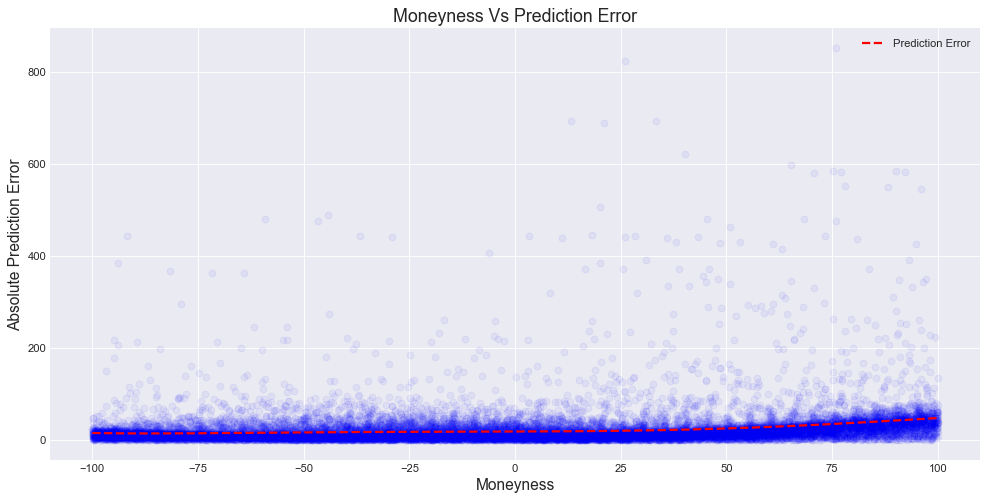

In [9]:
# Add columns to the X_test dataframe
X_test['call_price'] = y_test.values
X_test['call_price_predicted'] = pred_call_price
X_test['error'] = abs(X_test['call_price']-X_test['call_price_predicted'])

# Set the figure size and resolution
figure(figsize=(15, 7), dpi=80)

# Filter the data to be plotted
plot_data1 = X_test[(X_test.moneyness > -100) & ((X_test.moneyness < 100))]

# Plot the moneyness and error
plt.scatter(plot_data1.moneyness, plot_data1.error, alpha=0.05, color='blue')

# Fit and plot the line
model_poly1 = np.poly1d(np.polyfit(plot_data1.moneyness, plot_data1.error, 5))
polyline = np.linspace(-100, 100, 200)
plt.plot(polyline, model_poly1(polyline), color='red',
         linestyle='--', linewidth=2, label='Prediction Error')

# Set the label and title
plt.xlabel('Moneyness', fontsize=14)
plt.ylabel('Absolute Prediction Error', fontsize=14)
plt.title('Moneyness Vs Prediction Error', fontsize=16)
plt.legend()
plt.show()

<a id='conclusion'></a>
## Conclusion
As you can see, the errors for out-of-the-money contracts are closer to 0 and the error increases as we move to in-the-money contracts. Additionally, the model's performance is also below satisfactory. You can improve the performance of the model by trying out some other features or you can change the hyperparameters. However, ANN is not the only model that can be used to predict option prices. In the upcoming notebook, we are going to predict option prices with multiple models and compare their performances.
<br><br>